In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as md

#reading the Chl csv file
df_cl = pd.read_csv("Merging\Chlorophyll\Cl2014_2022.csv", encoding = 'unicode_escape', sep = ',')
#Removing a weird letter in the name of the thrid column
df_cl.columns = ['Datum', 'Uhrzeit', 'Chlorophyll_[µg/l]']
df_cl

#reading the O2 csv file
df_pH = pd.read_csv("Merging\pH\pH1988_2022.csv", encoding = 'unicode_escape', sep = ',')
df_pH




,Datum,Uhrzeit,pH_Wert
0,1988-06-19,01:00:00,7.50
1,1988-06-19,01:05:00,7.50
2,1988-06-19,01:10:00,7.50
3,1988-06-19,01:15:00,7.50
4,1988-06-19,01:20:00,7.50
...,...,...,...
1679266,2022-12-31,23:10:00,7.95
1679267,2022-12-31,23:20:00,7.95
1679268,2022-12-31,23:30:00,7.95
1679269,2022-12-31,23:40:00,7.95


In [3]:
#Merging O2 and pH has values with inner join from 1988 to 2022
df_cl_pH = df_pH.merge( df_cl, on = ['Datum', 'Uhrzeit'], how ="inner")
#Drop the rows with missing values for better readability and faster computetaion
df_cl_pH.dropna(subset=['pH_Wert', 'Chlorophyll_[µg/l]'], inplace = True )
#Change the forma to datetime
df_cl_pH['Datum'] = pd.to_datetime(df_cl_pH['Datum'])
df_cl_pH['Uhrzeit'] = pd.to_datetime(df_cl_pH['Uhrzeit'], format='%H:%M:%S', errors='coerce').dt.time
df_cl_pH

#Exporting to csv file
df_cl_pH.to_csv('Merging\Cl_pH\Cl_pH.csv', index = False)

#Creatin a year and month column for hue arg, and for removing winter months
df_cl_pH['Jahr'] = df_cl_pH['Datum'].dt.year
df_cl_pH['Monat'] = df_cl_pH['Datum'].dt.month

df_cl_pH


,Datum,Uhrzeit,pH_Wert,Chlorophyll_[µg/l],Jahr,Monat
0,2014-01-01,01:00:00,8.00,5.08,2014,1
6,2014-01-01,02:00:00,8.00,4.75,2014,1
13,2014-01-01,03:10:00,8.00,4.39,2014,1
19,2014-01-01,04:10:00,8.00,4.47,2014,1
26,2014-01-01,05:20:00,8.00,4.96,2014,1
...,...,...,...,...,...,...
281456,2022-12-31,18:50:00,7.96,7.19,2022,12
281463,2022-12-31,20:00:00,7.96,6.93,2022,12
281470,2022-12-31,21:10:00,7.95,6.07,2022,12
281477,2022-12-31,22:20:00,7.95,4.40,2022,12


In [4]:
#Changing column names to English
df_cl_pH.columns = ['Date', 'Hour', 'pH_Value', 'Chlorophyll_[µg/l]', 'Year',
       'Month']


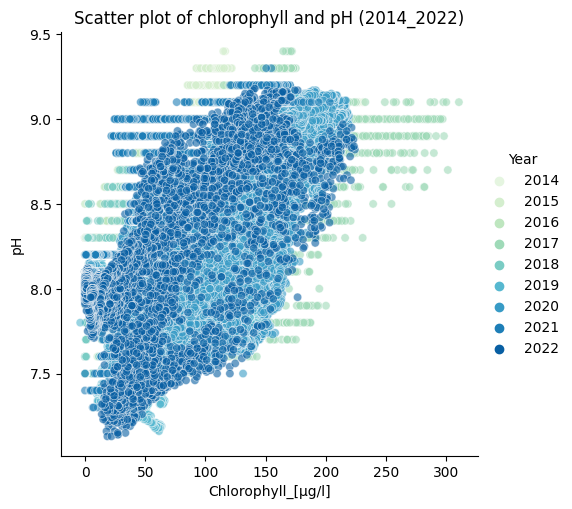

In [5]:
#Create a palette with 9 colors
custom_palette = sns.color_palette("GnBu", 9)
#Plot the graph
fig = sns.relplot(x = 'Chlorophyll_[µg/l]', y = 'pH_Value', data = df_cl_pH, kind = 'scatter', hue = 'Year',
            alpha = 0.6, palette = custom_palette).set(title = "Scatter plot of chlorophyll and pH (2014_2022)")
fig.set_xlabels("Chlorophyll_[µg/l]",fontsize=10)
fig.set_ylabels("pH", fontsize=10)
plt.show()



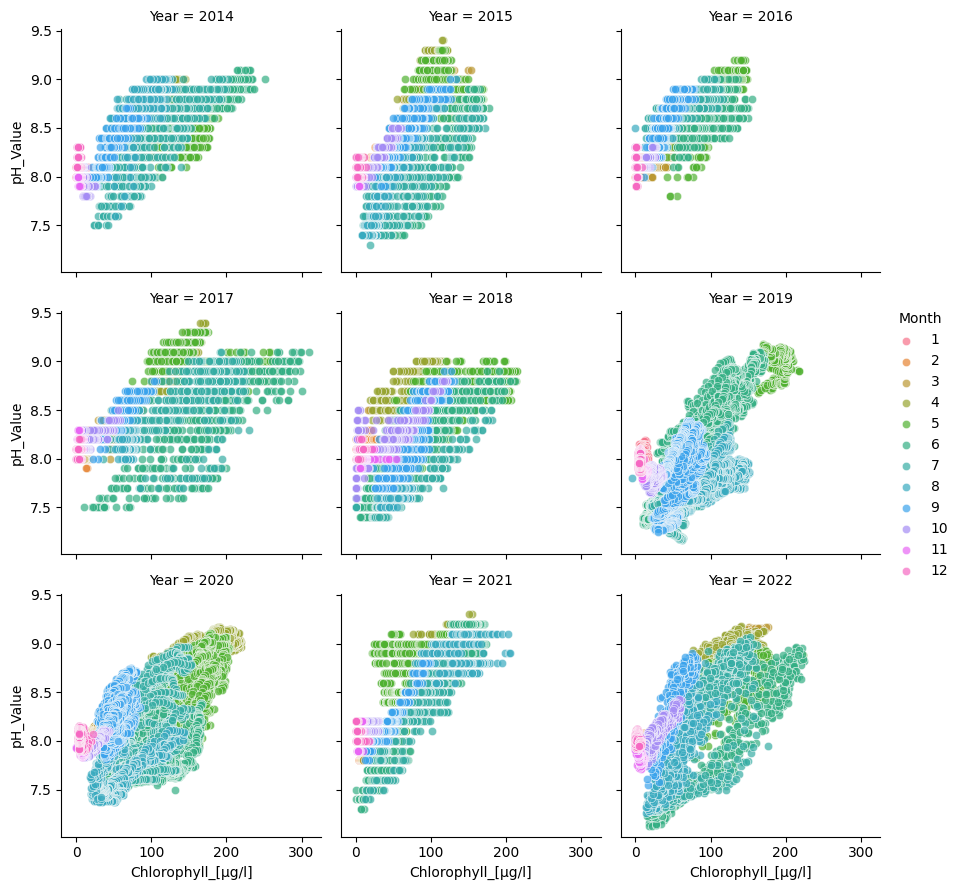

In [15]:
g = sns.FacetGrid(df_cl_pH, col="Year", col_wrap = 3, hue = 'Month')
g.map(sns.scatterplot, "Chlorophyll_[µg/l]", "pH_Value", alpha=.7)
g.add_legend()

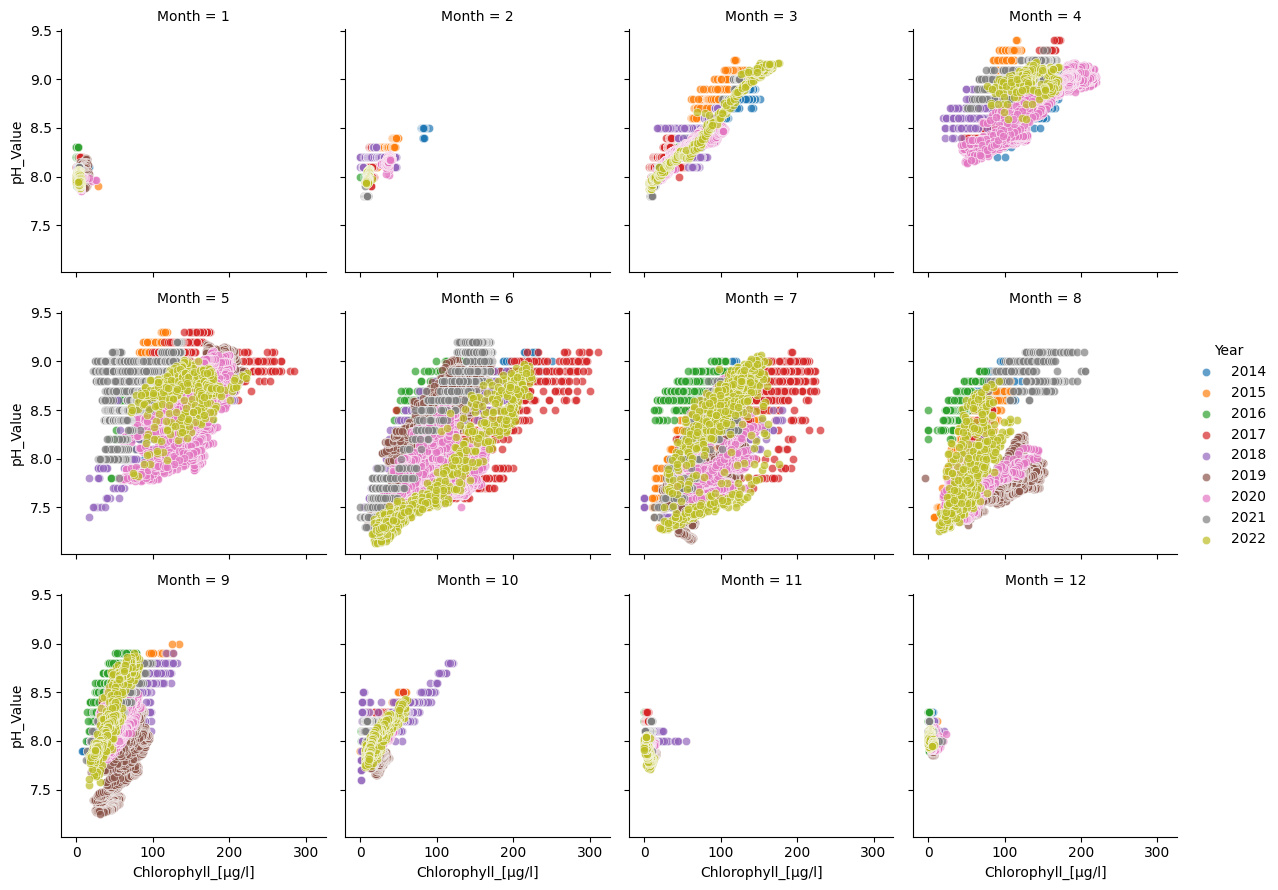

In [13]:
g = sns.FacetGrid(df_cl_pH, col="Month", col_wrap = 4, hue = 'Year')
g.map(sns.scatterplot, "Chlorophyll_[µg/l]", "pH_Value", alpha=.7)
g.add_legend()